In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from IPython.display import Image

In [3]:
!pip install pydot

In [4]:
import pydot 

In [5]:
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

In [6]:
%matplotlib inline
plt.style.use("seaborn-white")

In [7]:
#this function creates the images of the tree using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# Regression Trees

In [8]:
data = pd.read_csv("C:/Users/Harshit/Desktop/ISLR-python-master/Notebooks/Data/Hitters.csv")

In [9]:
data.dropna()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.000,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.000,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.000,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.500,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.000,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.000,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.000,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.000,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.000,A
10,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,...,702,504,488,A,E,238,445,22,517.143,A


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [11]:
data.shape

(322, 21)

In [12]:
#we need to drop the missing values
data = data.dropna()

In [13]:
data.shape

(263, 21)

In [14]:
#we will be taking just years and hits for exploration
X = data[["Years" , "Hits"]].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [15]:
X

array([[ 14,  81],
       [  3, 130],
       [ 11, 141],
       [  2,  87],
       [ 11, 169],
       [  2,  37],
       [  3,  73],
       [  2,  81],
       [ 13,  92],
       [ 10, 159],
       [  9,  53],
       [  4, 113],
       [  6,  60],
       [ 13,  43],
       [ 15, 158],
       [  5,  46],
       [  8,  32],
       [  1,  92],
       [  1, 109],
       [  6, 116],
       [ 18, 168],
       [  6, 163],
       [  7,  73],
       [ 10, 129],
       [  5, 152],
       [ 14, 137],
       [  3, 108],
       [  5, 168],
       [  7,  49],
       [ 14, 106],
       [  2,  60],
       [  2,  41],
       [  4,  46],
       [  6,  68],
       [  3, 132],
       [  5,  57],
       [  6, 146],
       [ 17, 101],
       [  2,  53],
       [  9, 168],
       [ 12, 101],
       [  6, 102],
       [  4,  58],
       [ 12,  78],
       [  6, 177],
       [  1, 113],
       [ 16,  44],
       [  4,  56],
       [  4,  53],
       [ 17, 139],
       [  3,  53],
       [  4, 142],
       [ 17,

In [16]:
y = np.log(data["Salary"].as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [17]:
y

array([6.1633148 , 6.1737861 , 6.2146081 , 4.51633897, 6.62007321,
       4.24849524, 4.60517019, 4.31748811, 7.00306546, 6.24831943,
       6.23930071, 6.30991828, 6.55108034, 5.48063892, 6.65286303,
       5.16478597, 4.90527478, 4.60517019, 4.74493213, 6.39692966,
       6.65501169, 6.63987583, 6.56291432, 6.62007321, 6.43775165,
       6.80239476, 4.70048037, 6.41754894, 5.70378247, 6.74523635,
       4.49980967, 4.2121276 , 5.19295685, 5.72031178, 5.37063803,
       5.51141058, 6.70318811, 6.77422389, 4.24849524, 7.09007684,
       6.51471269, 6.02827852, 5.82894562, 6.03228734, 7.20785987,
       4.49980967, 5.6167711 , 5.43807931, 5.4161004 , 6.85646198,
       4.31748811, 4.65396035, 5.768321  , 6.74523635, 6.28226675,
       6.83876205, 6.74523635, 5.34710753, 5.78382518, 5.6167711 ,
       6.10924758, 7.58832368, 7.54960917, 6.39692966, 6.94857759,
       4.70048037, 5.56068163, 6.1633148 , 6.06726751, 7.10660614,
       4.24849524, 4.97673374, 6.38856141, 7.52911641, 5.70378

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5, 0, 'log(Salary)')

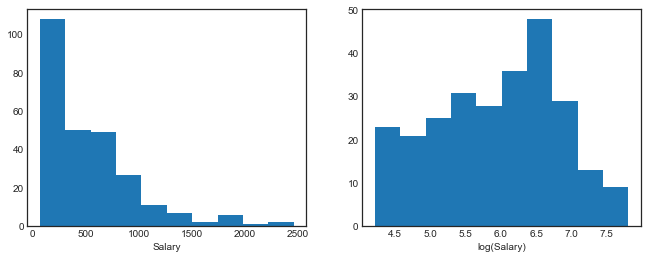

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(11,4))
ax1.hist(data.Salary.as_matrix())
ax1.set_xlabel("Salary")
ax2.hist(y)
ax2.set_xlabel("log(Salary)")

In [19]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


Text(11, 170, 'R3')

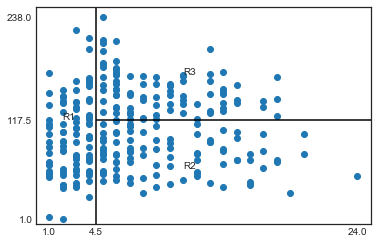

In [20]:
plt.scatter(data["Years"].as_matrix(),data["Hits"].as_matrix())
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1,4.5,24])
plt.yticks([1,117.5,238])
plt.vlines(4.5,ymin=-5,ymax=250)
plt.hlines(117.5,xmin=4.5,xmax=25)
plt.annotate("R1" , xy=(2,117.5))
plt.annotate("R2",xy=(11,60))
plt.annotate("R3",xy=(11,170))

In [21]:
data["Years"].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([14,  3, 11,  2, 11,  2,  3,  2, 13, 10,  9,  4,  6, 13, 15,  5,  8,
        1,  1,  6, 18,  6,  7, 10,  5, 14,  3,  5,  7, 14,  2,  2,  4,  6,
        3,  5,  6, 17,  2,  9, 12,  6,  4, 12,  6,  1, 16,  4,  4, 17,  3,
        4, 17, 14, 18, 15,  9,  4,  6,  4, 15,  5, 11,  9, 14,  2, 16,  4,
        5,  4,  1,  3, 12, 14,  3,  7, 10,  8, 14,  5,  1, 14,  5, 13,  3,
        6,  4, 16,  9,  8, 15, 20,  5,  5, 11,  5,  8,  5,  7,  7,  5, 18,
        4,  9,  3,  6, 15,  2,  2,  4, 12, 17,  6, 14,  5, 11, 15,  2,  1,
       10, 10,  5, 13,  3,  6,  3, 13, 14,  3,  4,  6,  4, 13,  3, 11,  5,
        1,  8, 14, 13,  6, 10,  4,  2,  9, 10,  7,  3,  1,  7,  2, 12, 15,
        6,  7, 10, 13,  3, 10,  1,  5,  7,  2,  2, 13,  6,  9,  1,  3,  6,
        3,  3,  2,  7,  3,  3,  4,  7,  4,  5,  2,  2,  9,  7,  4, 14,  1,
        9, 24,  5,  6,  5, 12,  5, 12, 16,  3, 18,  9,  8, 20,  5, 11,  6,
       12, 10,  9,  1,  7,  4,  6,  6,  4,  3,  1, 12,  1, 10, 13,  6,  3,
        4,  2,  2,  6, 18

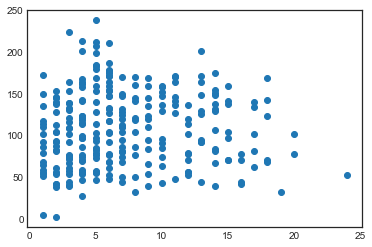

In [22]:
plt.scatter(data["Years"],data["Hits"])

# Classification Trees

In [23]:
df = pd.read_csv("C:/Users/Harshit/Desktop/ISLR-python-master/Notebooks/Data/Heart.csv")

In [24]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [25]:
df = df.drop("Unnamed: 0" ,axis=1).dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [27]:
#chestpain and thal are categorical predictors
#we need to convert them to numeric
df["ChestPain"] = pd.factorize(df["ChestPain"])[0]
df["Thal"] = pd.factorize(df["Thal"])[0]

In [28]:
X2 = df.drop("AHD" , axis=1)
y2 = pd.factorize(df["AHD"])[0]

In [29]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No
5,56,1,3,120,236,0,0,178,0,0.8,1,0.0,1,No
6,62,0,1,140,268,0,2,160,0,3.6,3,2.0,1,Yes
7,57,0,1,120,354,0,0,163,1,0.6,1,0.0,1,No
8,63,1,1,130,254,0,2,147,0,1.4,2,1.0,2,Yes
9,53,1,1,140,203,1,2,155,1,3.1,3,0.0,2,Yes


In [30]:
y2

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int6

In [31]:
clf = DecisionTreeClassifier(max_depth=None,max_leaf_nodes=100,max_features=12)

In [32]:
clf.fit(X2,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=12, max_leaf_nodes=100, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
clf.score(X2,y2)

1.0

In [34]:
#as we can see that if the leaves are greater than the accuracy will keep on increasing (but actually we are overfitting the dataset)

# Fitting classification Trees

In [35]:
df3 = pd.read_csv("C:/Users/Harshit/Desktop/ISLR-python-master/Notebooks/Data/Carseats.csv").drop("Unnamed: 0",axis=1)
df3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [37]:
df3["High"] = df3.Sales.map(lambda x:1 if x>8 else 0)

In [38]:
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

In [39]:
df3.US = df3.US.map({"No":0,"Yes":1})
df3.Urban = df3.Urban.map({"No":0 , "Yes":1})

In [40]:
df3.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [41]:
X3 = df3.drop(["Sales","High"],axis=1)
y3 = df3.High

In [42]:
X_train , X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3,random_state=0)

In [43]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X3,y3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
clf.score(X3,y3)

0.9175

In [45]:
print(classification_report(y3,clf.predict(X3)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

   micro avg       0.92      0.92      0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [46]:
bclf = BaggingClassifier()
bclf.fit(X3,y3)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [47]:
bclf.score(X3,y3)

0.9925

# fitting Regressor Trees

In [48]:
boston_df =pd.read_csv("C:/Users/Harshit/Desktop/ISLR-python-master/Notebooks/Data/Boston.csv")

In [49]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [50]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [51]:
X = boston_df.drop("medv",axis=1)
y = boston_df["medv"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
#Bagging all the features 
regr1 = RandomForestRegressor(max_features=13,random_state=1)
regr1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [53]:
pred = regr1.predict(X_test)

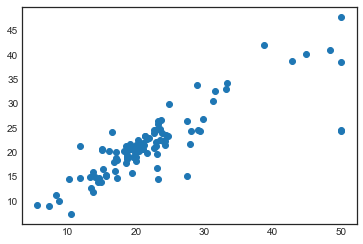

In [54]:
plt.scatter(y_test , pred)

In [55]:
mean_squared_error(y_test,pred)

23.94645784313725

In [56]:
regr2 = RandomForestRegressor(max_features=6,random_state=1)
regr2.fit(X_train,y_train)
pred2 = regr2.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


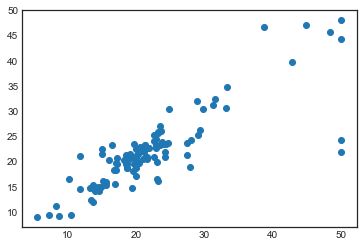

In [57]:
plt.scatter(y_test,pred2)

In [58]:
mean_squared_error(y_test,pred2)

23.83120196078431

In [59]:
regr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,random_state=1)
regr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

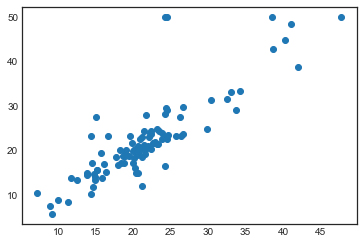

In [60]:
pred3 = regr.predict(X_test)
plt.scatter(pred,y_test)

In [61]:
mean_squared_error(pred3,y_test)

18.474110469158116